## measuring model performance:
wikipedia: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
1. ROC (Receiver Operating Characteristic)
1. AUC (Area Under the Curve)


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand
---

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


## Study hours example: 
* https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In [4]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv'
# df=pd.read_csv(url)
df=pd.read_csv(url)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


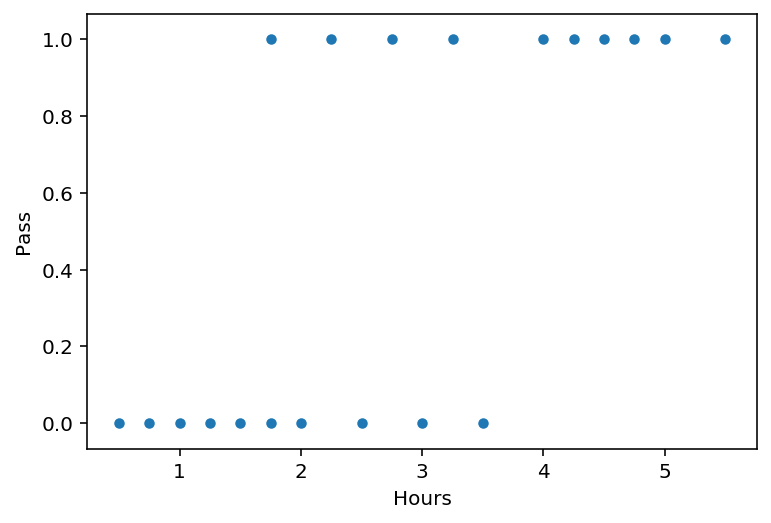

In [5]:
sns.scatterplot(data=df, x='Hours', y='Pass');

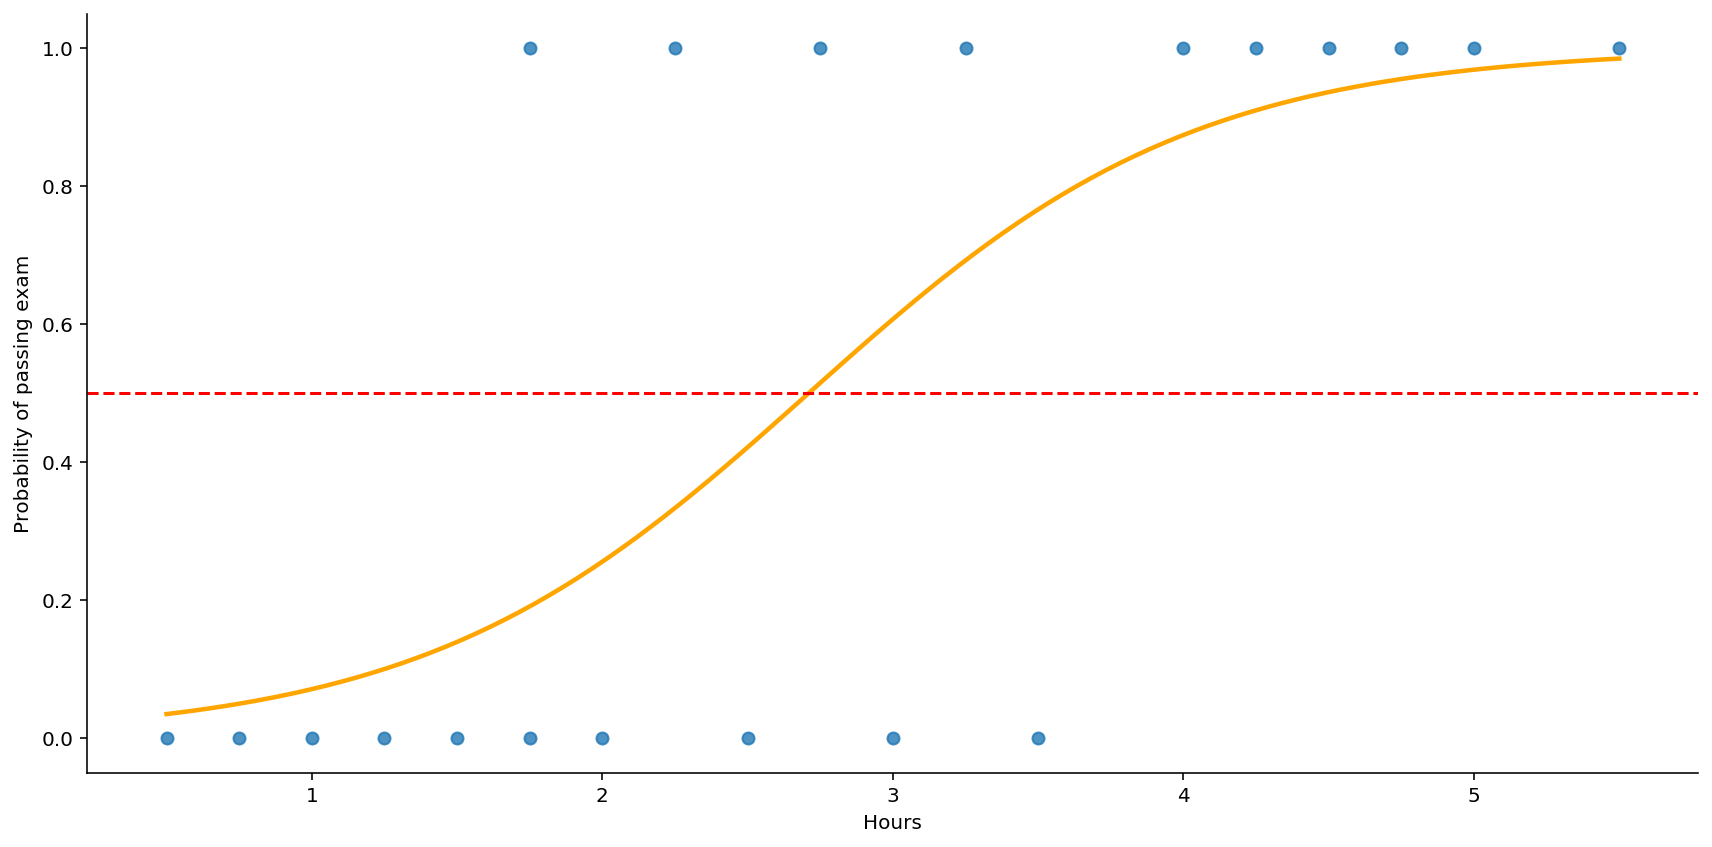

In [6]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=6, aspect=2, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
# plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

## Lotistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [8]:
X=df[['Hours']]
y=df.Pass

In [9]:
# model = LogisticRegression(solver='lbfgs') # regularization
# model = LogisticRegression(solver='liblinear') # with regularization
model = LogisticRegression(C = 1e10, solver='lbfgs') # disable regularization, similar to statsmodels result
# model = SVC()
# model = RandomForestClassifier()
model

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model.fit(X, y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(X, y) # accuracy of the model

0.8

In [12]:
model.intercept_

array([-4.07771764])

In [13]:
model.coef_

array([[1.50464522]])

In [14]:
from IPython.display import Markdown
Markdown(r"$$prob = \frac{1}{1+exp^{-(%.4f x + %.4f)}}$$"%(model.coef_, model.intercept_))

$$prob = \frac{1}{1+exp^{-(1.5046 x + -4.0777)}}$$

In [15]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [16]:
y.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
np.sum(y.values == y_pred)

16

In [18]:
np.sum(y.values != y_pred)

4

In [19]:
model.predict_proba(X) # col 0: probability estimates of the negative, col 1: probability estimates of the positive

array([[0.96528981, 0.03471019],
       [0.95022726, 0.04977274],
       [0.92910833, 0.07089167],
       [0.89997179, 0.10002821],
       [0.86065607, 0.13934393],
       [0.8091642 , 0.1908358 ],
       [0.8091642 , 0.1908358 ],
       [0.7442977 , 0.2557023 ],
       [0.6664708 , 0.3335292 ],
       [0.57837462, 0.42162538],
       [0.48499033, 0.51500967],
       [0.39264251, 0.60735749],
       [0.30738371, 0.69261629],
       [0.23352005, 0.76647995],
       [0.12555305, 0.87444695],
       [0.08972278, 0.91027722],
       [0.06337664, 0.93662336],
       [0.04438951, 0.95561049],
       [0.03090309, 0.96909691],
       [0.01480564, 0.98519436]])

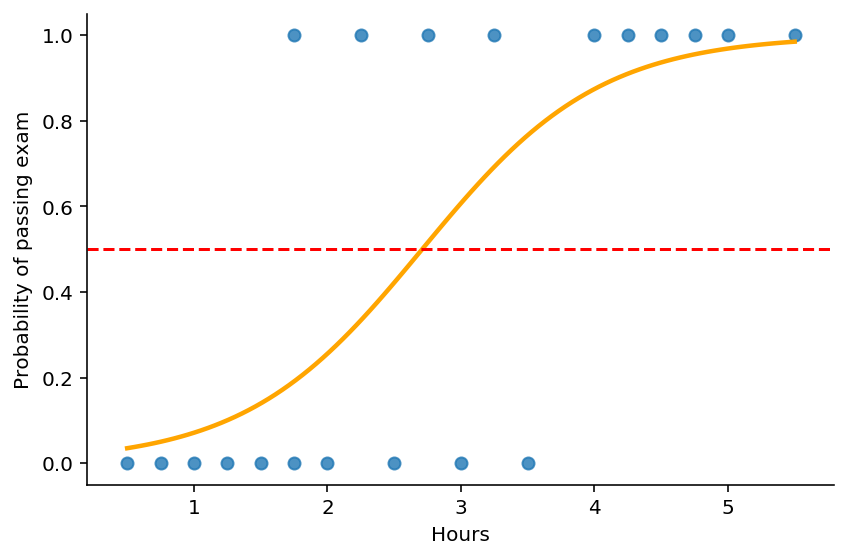

In [20]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=4, aspect=1.5, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
# plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

In [21]:
model.predict_proba(X)

array([[0.96528981, 0.03471019],
       [0.95022726, 0.04977274],
       [0.92910833, 0.07089167],
       [0.89997179, 0.10002821],
       [0.86065607, 0.13934393],
       [0.8091642 , 0.1908358 ],
       [0.8091642 , 0.1908358 ],
       [0.7442977 , 0.2557023 ],
       [0.6664708 , 0.3335292 ],
       [0.57837462, 0.42162538],
       [0.48499033, 0.51500967],
       [0.39264251, 0.60735749],
       [0.30738371, 0.69261629],
       [0.23352005, 0.76647995],
       [0.12555305, 0.87444695],
       [0.08972278, 0.91027722],
       [0.06337664, 0.93662336],
       [0.04438951, 0.95561049],
       [0.03090309, 0.96909691],
       [0.01480564, 0.98519436]])

In [22]:
model.predict_proba(X)[:, 1]

array([0.03471019, 0.04977274, 0.07089167, 0.10002821, 0.13934393,
       0.1908358 , 0.1908358 , 0.2557023 , 0.3335292 , 0.42162538,
       0.51500967, 0.60735749, 0.69261629, 0.76647995, 0.87444695,
       0.91027722, 0.93662336, 0.95561049, 0.96909691, 0.98519436])

In [23]:
np.where(model.predict_proba(X)[:, 1] >= .01, 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## play with threshold 

### plot logistic regression with a given threshold

In [24]:
def sp(intercept, coef, x):
    '''
    logistic regression function (propability curve)
    '''
    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

def solve(intercept, coef, threshold):
    '''
    หาค่า x ที่ตัดค่า prop (ที่ได้จากสมการ logistic regression) ณ threshold ที่กำหนด
    '''
    return (-np.log(1/threshold-1)-intercept) / coef

def precision(cfm):
    '''
    precision
    '''
    tn, fp, fn, tp = cfm.ravel()
    return tp / (tp + fp)

def tpr(cfm):
    '''
    true positive rate (recall)
    '''
    tn, fp, fn, tp = cfm.ravel()
    return tp / (tp + fn)

def fpr(cfm):
    '''
    false positive rate'''
    tn, fp, fn, tp = cfm.ravel()
    return fp / (fp + tn)

def cm(model, X, y, thres=.5):
    '''
    confusion matrix at a given threshold
    '''
    y_score=model.predict_proba(X)[:, 1]
    y_pred_tmp=np.where(y_score >= thres, 1, 0)
    return metrics.confusion_matrix(y, y_pred_tmp)

def plot_threshold(model, X, y, thres):
    '''
    plot logistic regression with a given threshold
    '''
    y_score=model.predict_proba(X)[:, 1]
    y_pred_tmp=np.where(y_score >= thres, 1, 0)
    cfm=cm(model, X, y, thres)
    
    xp=np.linspace(np.min(X), np.max(X), 30)
    yp=sp(model.intercept_, model.coef_, xp).ravel()
    plt.scatter(X, y, c=y_pred_tmp)
    plt.plot(xp, yp, color='lightblue')
    plt.axhline(thres, color='salmon', linestyle='--')
    plt.axvline(solve(model.intercept_, model.coef_, thres), color='green', linestyle='--')
    plt.title(f'threshold={thres:.2f}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}, prec = {precision(cfm):.2f}');
#     plt.savefig('lr2.svg')
    return plt

#### threshold=.5 

In [25]:
thres=.5
y_pred_t5=np.where(model.predict_proba(X)[:, 1]>=thres, 1, 0)
# =IF(model.predict_proba(X)[:, 1]>=thres,1,0)
y_pred_t5


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [27]:
y.values # convert pandas Series to numpy array

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [28]:
pd.crosstab(y, y_pred_t5)

col_0,0,1
Pass,,
0,8,2
1,2,8


In [29]:
cm(model, X, y, .5)

array([[8, 2],
       [2, 8]], dtype=int64)

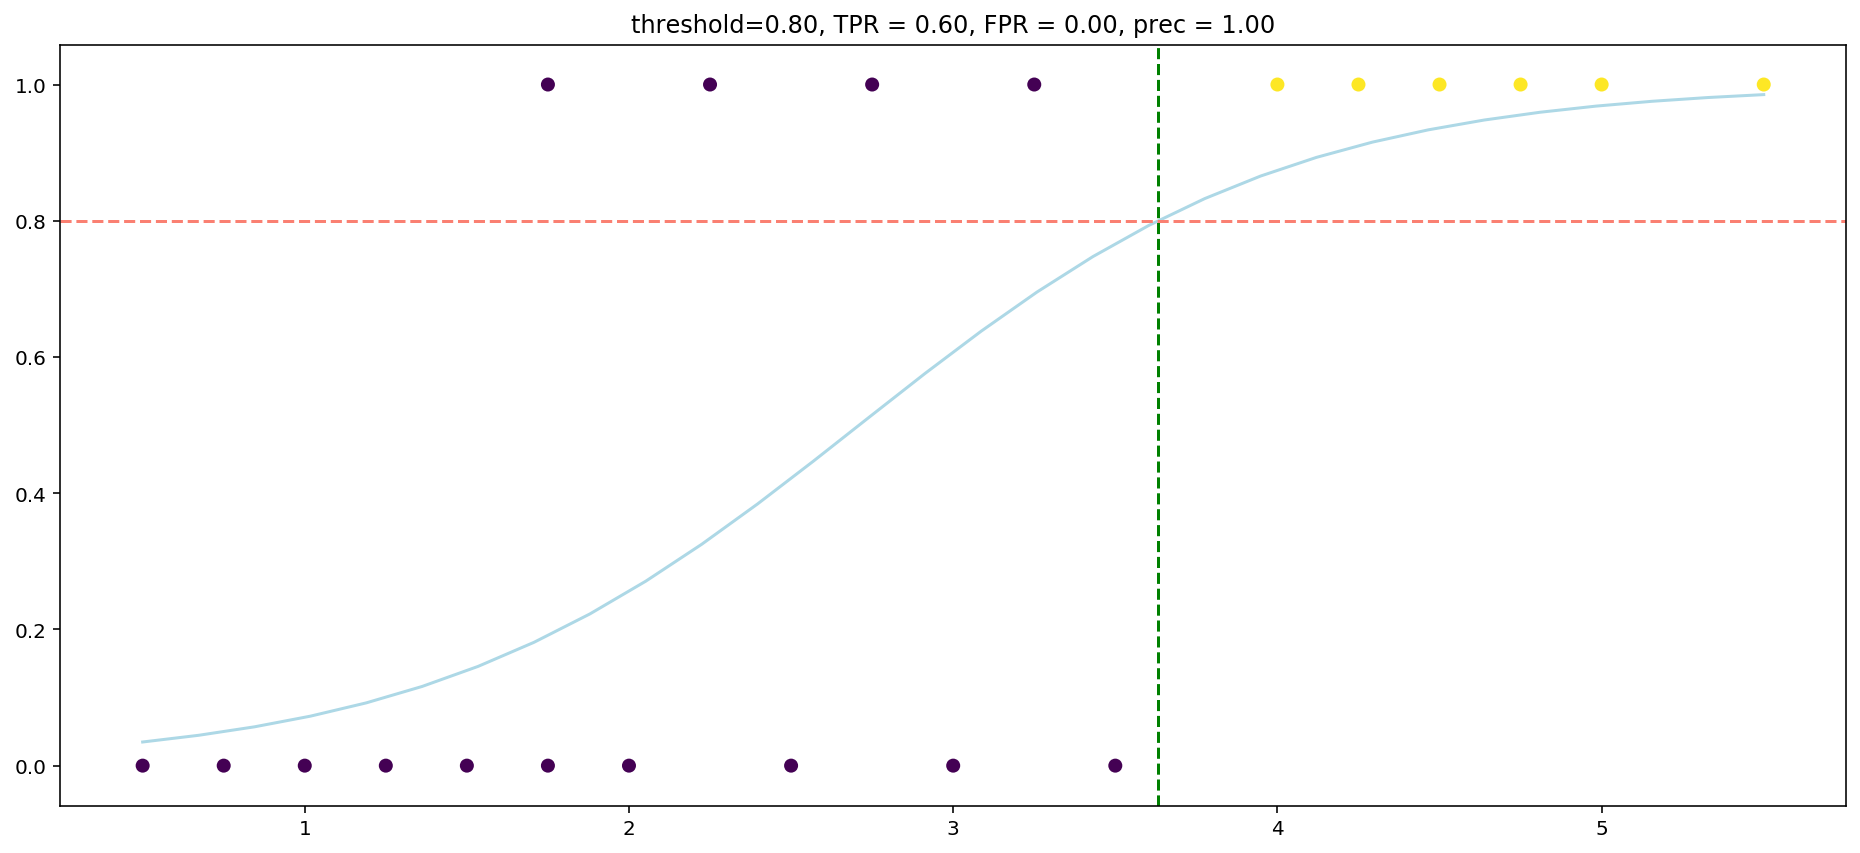

In [30]:
plt.figure(figsize=(16,7))
plot_threshold(model, X, y, thres=.8);

In [31]:
def pretty_xtab_confusion_matrix(y_true, y_predict):
    '''
    xtab y_true with y_predict with labels and total
    '''
    return pd.crosstab(y_true, y_predict, 
                       rownames=['Actual'], 
                       colnames=['Predicted'],
                       margins=True, margins_name='Total')  

In [32]:
pretty_xtab_confusion_matrix(y, y_pred_t5)

Predicted,0,1,Total
Actual,,,
0,8,2,10
1,2,8,10
Total,10,10,20


#### threshold=.8

In [33]:
thres=.8
y_pred_t8=np.where(model.predict_proba(X)[:, 1]>=thres,1,0)
y_pred_t8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [34]:
pretty_xtab_confusion_matrix(y, y_pred_t8)

Predicted,0,1,Total
Actual,,,
0,10,0,10
1,4,6,10
Total,14,6,20


In [35]:
cm(model, X, y, .8)

array([[10,  0],
       [ 4,  6]], dtype=int64)

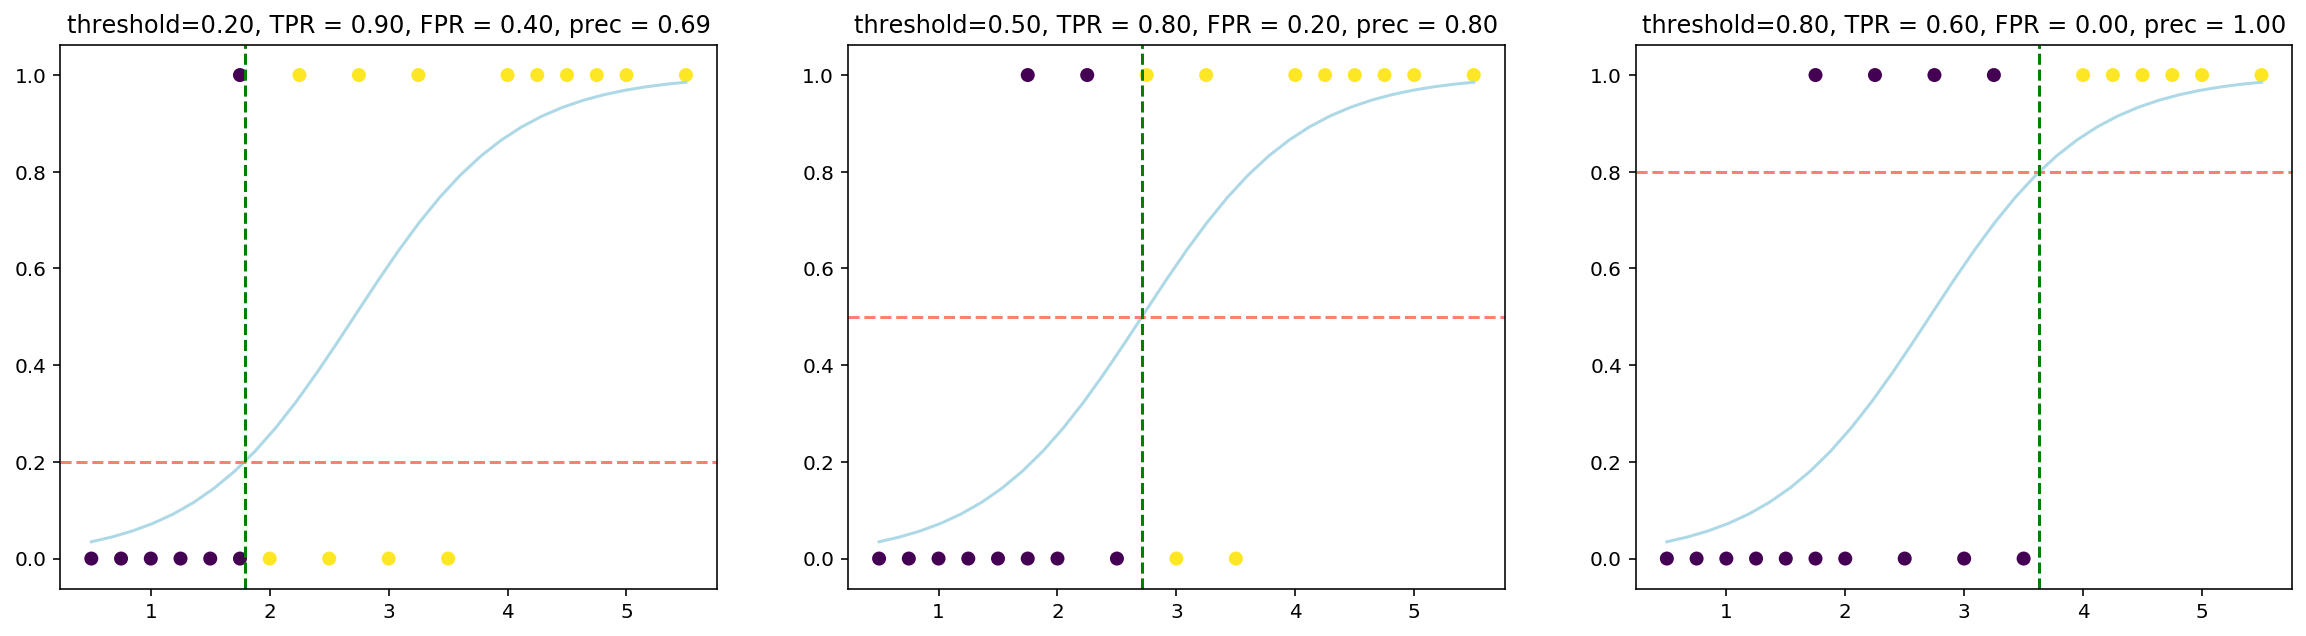

In [36]:
fig = plt.figure(figsize=(20, 5))
fig.add_subplot(131)
plot_threshold(model, X, y, thres=.2)
fig.add_subplot(132)
plot_threshold(model, X, y, thres=.5)
fig.add_subplot(133)
plot_threshold(model, X, y, thres=.8)
plt.show()

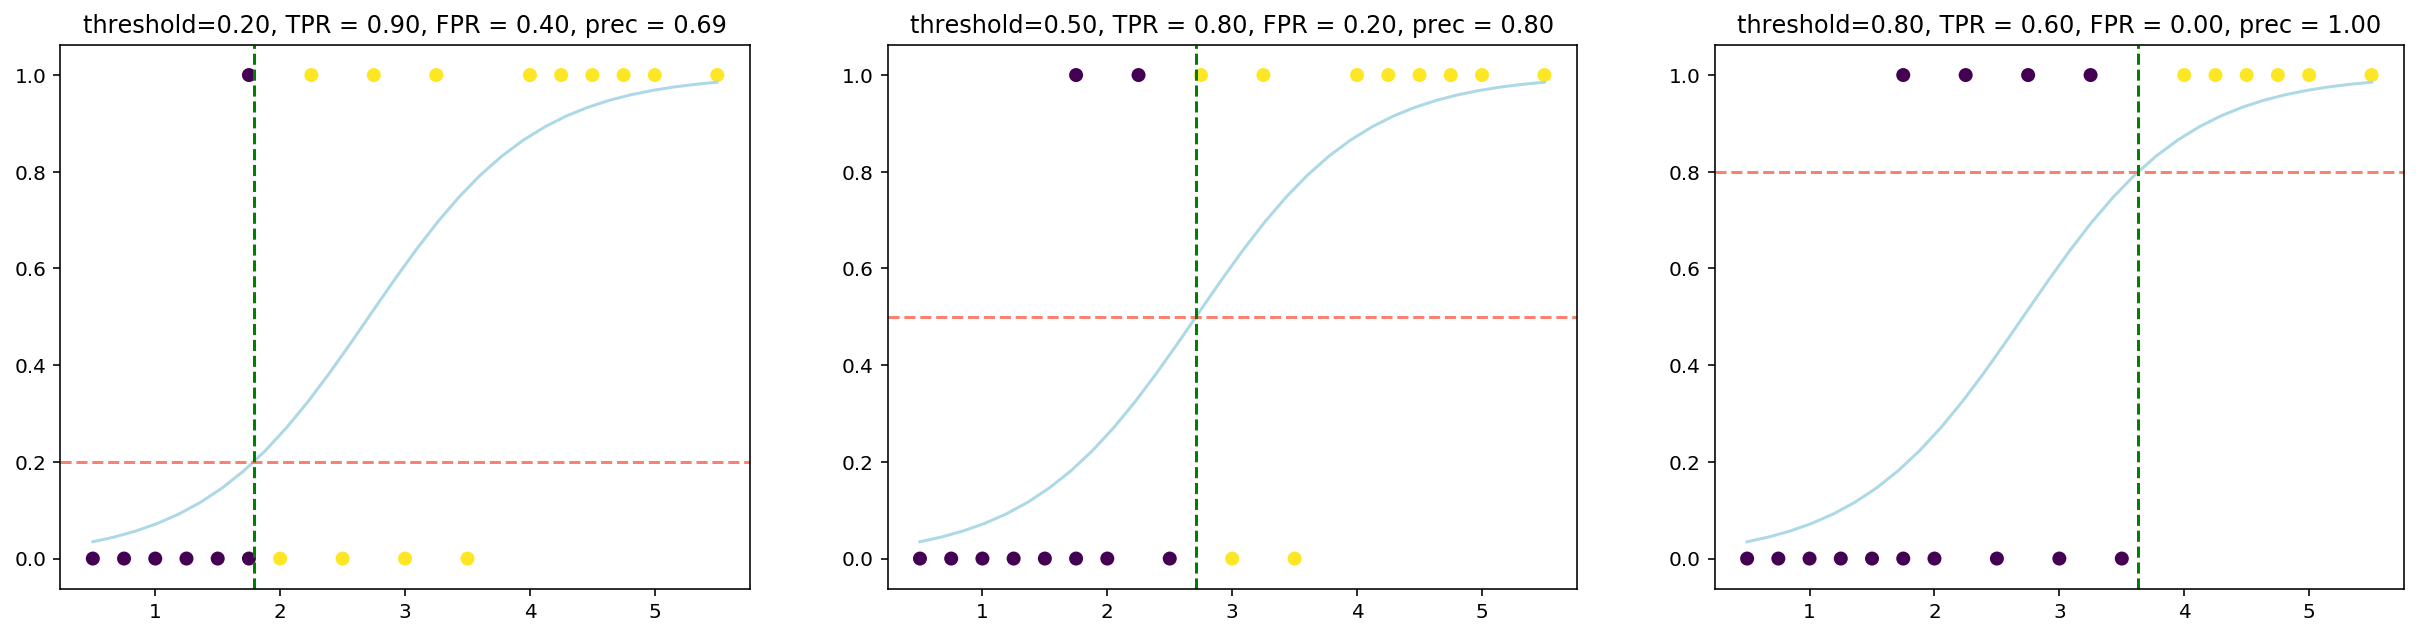

In [37]:
thresholds=np.array([.2, .5, .8])
# thresholds=np.linspace(0.05, .95, 10)

n=len(thresholds)
n_rows=1
n_cols=math.ceil(n / n_rows)
fig = plt.figure(figsize=(7 * n_cols, 5 * n_rows))

for i in range(0, len(thresholds)):
    fig.add_subplot(n_rows, n_cols, i+1)
    plot_threshold(model, X, y, thres=thresholds[i])
plt.show()

$$f(x)={\frac {1}{1+e^{-x}}}$$

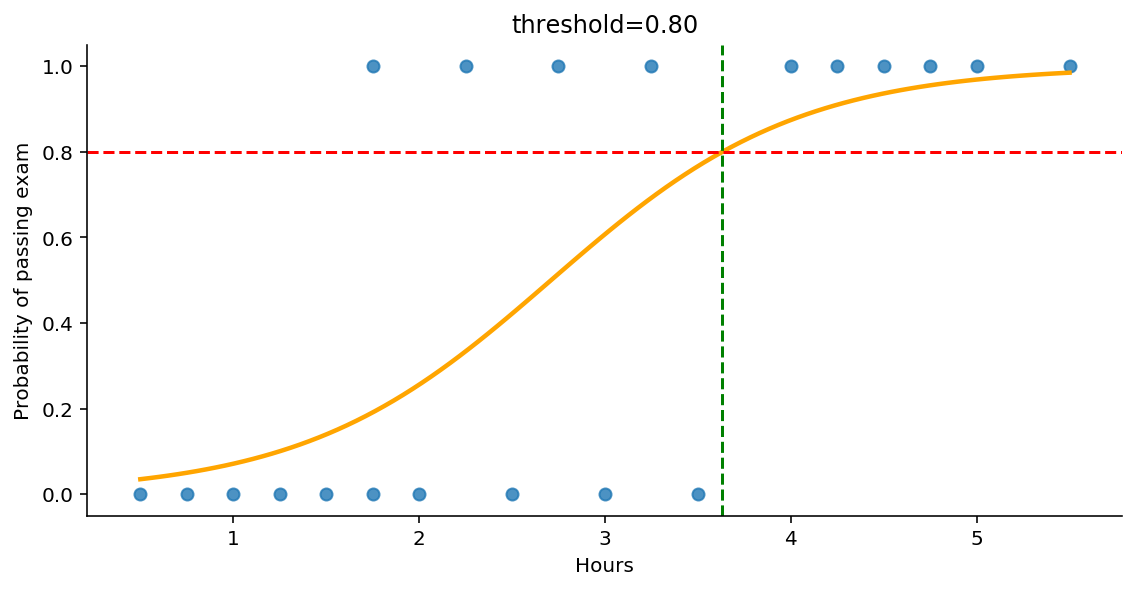

In [38]:
threshold=.8
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=4, aspect=2, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(solve(model.intercept_, model.coef_, threshold), color='green', linestyle='--')
plt.axhline(threshold, color='red', linestyle='--')
plt.title(f'threshold={threshold:.2f}');

In [39]:
@interact(threshold=(0.05, 1, .05))
def plot(threshold):
    plt.figure(figsize=(10, 6))
    plot_threshold(model, X, y, threshold);
#     plt.savefig('chart1.svg') # scalable vector graphic (recommend)
#     plt.savefig('chart1.png') # png
#     plt.savefig(f'chart_{pd.Timestamp.now().strftime("%Y%m%dT%H%M%S")}.svg')    

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, min=0.05, step=0.05), Output())…

In [40]:
thresholds=np.linspace(0.05, .95, 10)
for thres in thresholds:
    cfm=cm(model, X, y, thres)
    print(f'threshold={thres:.2f}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}, precision = {precision(cfm):.2f}');    
    print(cfm)
    print('-' * 100)

threshold=0.05, TPR = 1.00, FPR = 0.80, precision = 0.56
[[ 2  8]
 [ 0 10]]
----------------------------------------------------------------------------------------------------
threshold=0.15, TPR = 1.00, FPR = 0.50, precision = 0.67
[[ 5  5]
 [ 0 10]]
----------------------------------------------------------------------------------------------------
threshold=0.25, TPR = 0.90, FPR = 0.40, precision = 0.69
[[6 4]
 [1 9]]
----------------------------------------------------------------------------------------------------
threshold=0.35, TPR = 0.80, FPR = 0.30, precision = 0.73
[[7 3]
 [2 8]]
----------------------------------------------------------------------------------------------------
threshold=0.45, TPR = 0.80, FPR = 0.20, precision = 0.80
[[8 2]
 [2 8]]
----------------------------------------------------------------------------------------------------
threshold=0.55, TPR = 0.70, FPR = 0.20, precision = 0.78
[[8 2]
 [3 7]]
-------------------------------------------------------

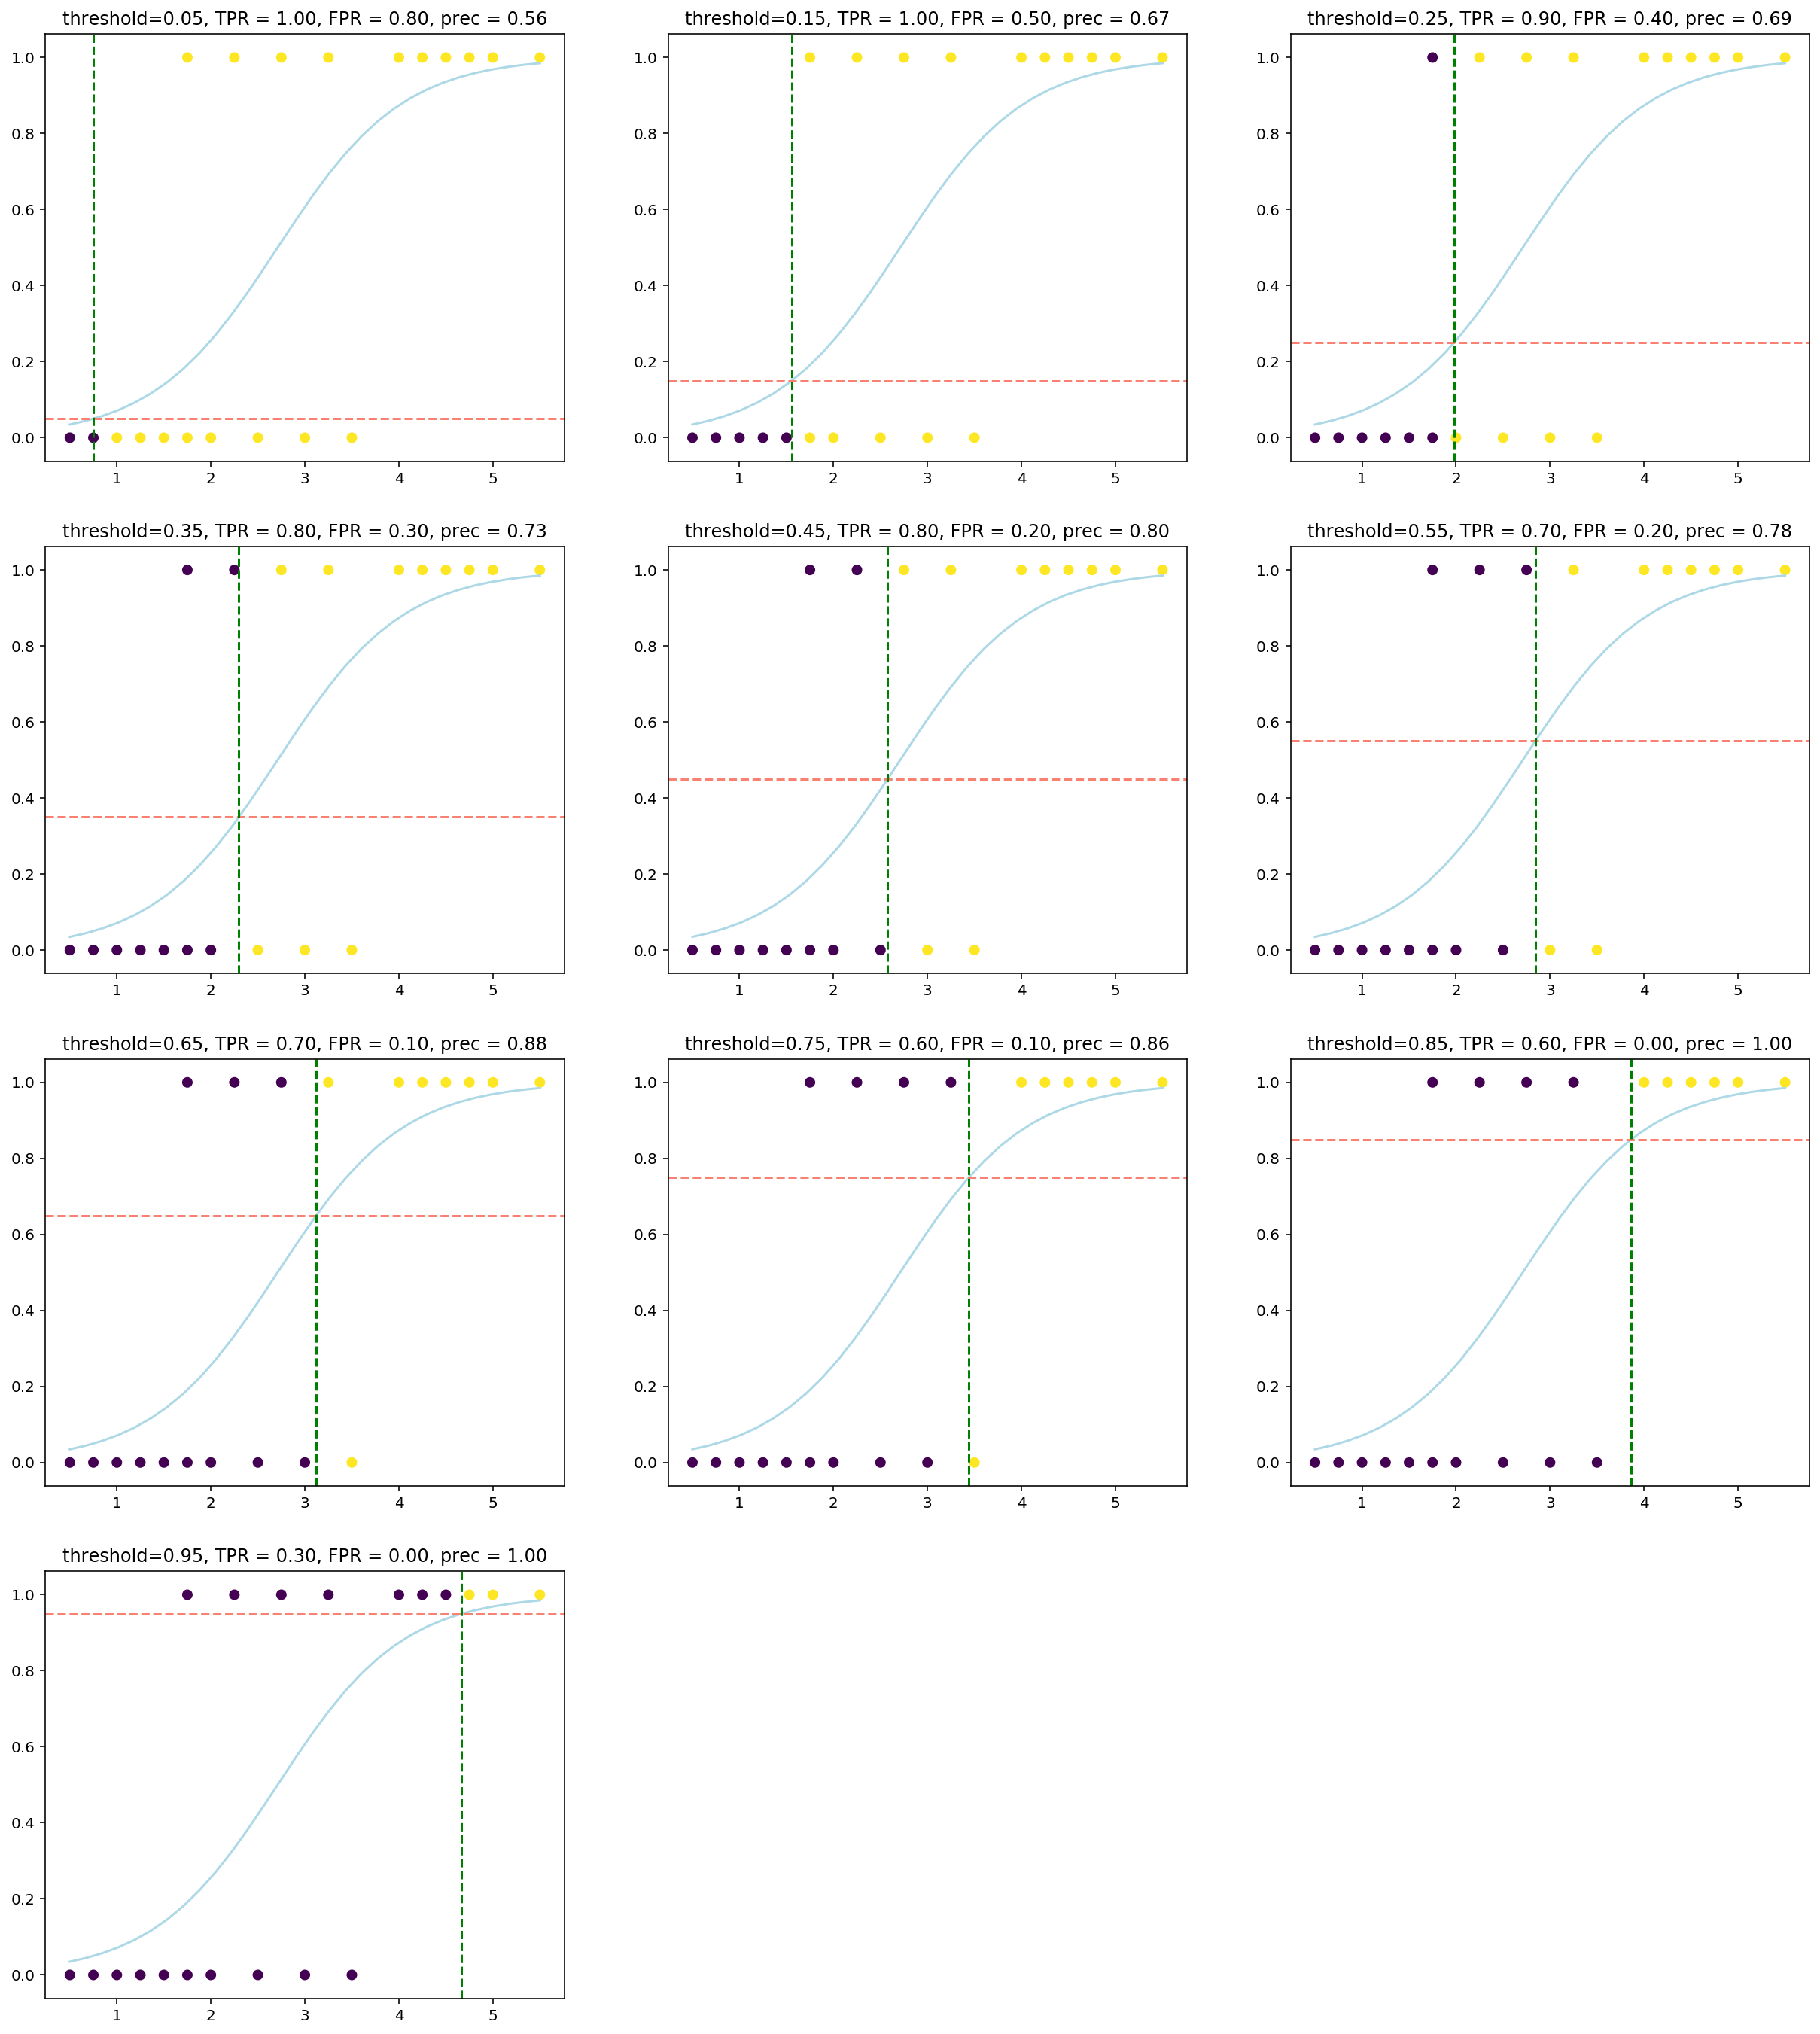

In [41]:
n=10
thresholds=np.linspace(0.05, .95, n)
n_rows=4
n_cols=math.ceil(n / n_rows)
fig = plt.figure(figsize=(7 * n_cols, 6 * n_rows))

for i in range(0, len(thresholds)):
    fig.add_subplot(n_rows, n_cols, i+1)
    plot_threshold(model, X, y, thres=thresholds[i])
plt.show()

In [42]:
model.predict_proba([[4.75]])

array([[0.04438951, 0.95561049]])

In [43]:
sp(model.intercept_, model.coef_, 4.75) # model.predict([[4.75]])

array([[0.95561049]])

In [44]:
model.predict_proba([[0.75]])

array([[0.95022726, 0.04977274]])

In [45]:
sp(model.intercept_, model.coef_, 0.75)

array([[0.04977274]])

In [46]:
sp(model.intercept_, model.coef_, df['Hours'].values).ravel()

array([0.03471019, 0.04977274, 0.07089167, 0.10002821, 0.13934393,
       0.1908358 , 0.1908358 , 0.2557023 , 0.3335292 , 0.42162538,
       0.51500967, 0.60735749, 0.69261629, 0.76647995, 0.87444695,
       0.91027722, 0.93662336, 0.95561049, 0.96909691, 0.98519436])

In [47]:
model.predict_proba(X)[:, 1]

array([0.03471019, 0.04977274, 0.07089167, 0.10002821, 0.13934393,
       0.1908358 , 0.1908358 , 0.2557023 , 0.3335292 , 0.42162538,
       0.51500967, 0.60735749, 0.69261629, 0.76647995, 0.87444695,
       0.91027722, 0.93662336, 0.95561049, 0.96909691, 0.98519436])

In [48]:
df['prob_pass']=model.predict_proba(X)[:, 1]
df.head()

,Hours,Pass,prob_pass
0,0.50,0,0.034710
1,0.75,0,0.049773
2,1.00,0,0.070892
3,1.25,0,0.100028
4,1.50,0,0.139344


## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [49]:
metrics.confusion_matrix(y, y_pred)

array([[8, 2],
       [2, 8]], dtype=int64)

In [50]:
# pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name='Total')
pretty_xtab_confusion_matrix(y, y_pred)

Predicted,0,1,Total
Actual,,,
0,8,2,10
1,2,8,10
Total,10,10,20


In [51]:
metrics.confusion_matrix(y, y_pred).ravel()

array([8, 2, 2, 8], dtype=int64)

In [52]:
tn, fp, fn, tp = metrics.confusion_matrix(y, y_pred).ravel()

In [53]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 8
fp = 2
fn = 2
tp = 8


$$
\begin{align}
\text {Precision}&={\frac {TP}{TP+FP}}\\
\text {True Positive Rate (TPR), hit rate, recall, sensitivity}&={\frac {TP}{TP+FN}}\\
\text {False Positive Rate (FPR), miss rate}&={\frac {FP}{FP+TN}}
\end{align}
$$

In [54]:
tpr(metrics.confusion_matrix(y, y_pred))

0.8

In [55]:
fpr(metrics.confusion_matrix(y, y_pred))

0.2

In [56]:
model.predict_proba(X) # col 0: probability estimates of the negative, col 1: probability estimates of the positive

array([[0.96528981, 0.03471019],
       [0.95022726, 0.04977274],
       [0.92910833, 0.07089167],
       [0.89997179, 0.10002821],
       [0.86065607, 0.13934393],
       [0.8091642 , 0.1908358 ],
       [0.8091642 , 0.1908358 ],
       [0.7442977 , 0.2557023 ],
       [0.6664708 , 0.3335292 ],
       [0.57837462, 0.42162538],
       [0.48499033, 0.51500967],
       [0.39264251, 0.60735749],
       [0.30738371, 0.69261629],
       [0.23352005, 0.76647995],
       [0.12555305, 0.87444695],
       [0.08972278, 0.91027722],
       [0.06337664, 0.93662336],
       [0.04438951, 0.95561049],
       [0.03090309, 0.96909691],
       [0.01480564, 0.98519436]])

In [57]:
y_score=model.predict_proba(X)[:, 1] # probability estimates of the positive
y_score

array([0.03471019, 0.04977274, 0.07089167, 0.10002821, 0.13934393,
       0.1908358 , 0.1908358 , 0.2557023 , 0.3335292 , 0.42162538,
       0.51500967, 0.60735749, 0.69261629, 0.76647995, 0.87444695,
       0.91027722, 0.93662336, 0.95561049, 0.96909691, 0.98519436])

sklearn roc_curve: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

## ROC

In [58]:
metrics.roc_curve(y, y_score)

(array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 1. ]),
 array([0. , 0.1, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 1. , 1. ]),
 array([1.98519436, 0.98519436, 0.87444695, 0.76647995, 0.69261629,
        0.60735749, 0.51500967, 0.42162538, 0.3335292 , 0.2557023 ,
        0.1908358 , 0.03471019]))

In [59]:
fprs, tprs, thresholds = metrics.roc_curve(y, y_score)
# thresholds

In [60]:
pd.DataFrame({'fpr': fprs, 'tpr': tprs, 'threshold': thresholds}).T

,0,1,2,3,4,5,6,7,8,9,10,11
fpr,0.000000,0.000000,0.000000,0.10000,0.100000,0.200000,0.20000,0.300000,0.300000,0.400000,0.500000,1.00000
tpr,0.000000,0.100000,0.600000,0.60000,0.700000,0.700000,0.80000,0.800000,0.900000,0.900000,1.000000,1.00000
threshold,1.985194,0.985194,0.874447,0.76648,0.692616,0.607357,0.51501,0.421625,0.333529,0.255702,0.190836,0.03471


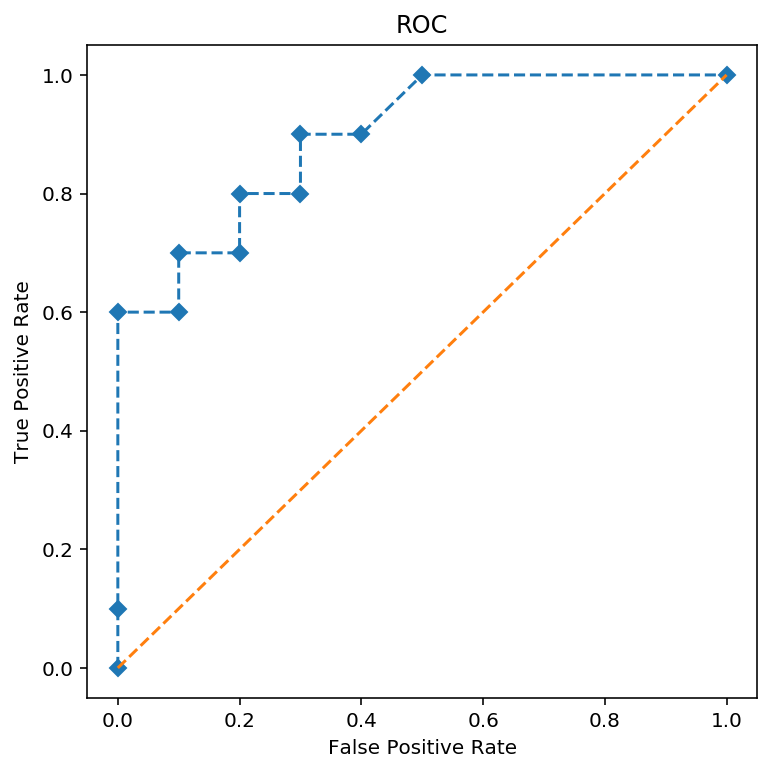

In [61]:
plt.figure(figsize=(6, 6))
plt.plot(fprs, tprs, '--D');
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');
plt.plot([0, 1], [0, 1], '--');

## AUC

In [62]:
auc=metrics.auc(fprs, tprs)
auc

0.895

In [63]:
def plot_roc(model, X, y, show_threshold=True, n_points=None): 
    # n_points เป็นจำนวนจุดใน thresholds ที่ต้องการ plot
    # y= y_true
    # y_score = probability estimates of the positive
    y_score=model.predict_proba(X)[:, 1] # probability estimates of the positive
    fprs, tprs, thresholds = metrics.roc_curve(y, y_score)
    
    auc=metrics.auc(fprs, tprs)
    if n_points is not None:
        n=len(fprs)
        fprs=fprs[::int(n/n_points)]
        tprs=tprs[::int(n/n_points)]
        thresholds=thresholds[::int(n/n_points)]
    
    plt.plot(fprs, tprs, '--o');
    plt.title(f'ROC (AUC={auc:.4f})')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate');
    plt.plot([0, 1], [0, 1], '--')
    if show_threshold:
        for i, lbl in enumerate(thresholds):
            plt.text(fprs[i]+.01, tprs[i]+.01, f'{lbl:.2f}', fontsize=8)
            
def plot_tpr_fpr(model, X, y, n_points=None):
    y_score=model.predict_proba(X)[:, 1] # probability estimates of the positive
    fprs, tprs, thresholds = metrics.roc_curve(y, y_score)
    if n_points is not None:
        n=len(fprs)
        fprs=fprs[::int(n/n_points)]
        tprs=tprs[::int(n/n_points)]
        thresholds=thresholds[::int(n/n_points)]
        
    plt.plot(thresholds, tprs, '--o', label='TPR')
    plt.plot(thresholds, fprs, '--s', label='FPR')
    plt.axvline(.5, color='green', linestyle='--')
    plt.legend()
    plt.xlabel('threshold')
    plt.ylabel('True/False Positive Rate')

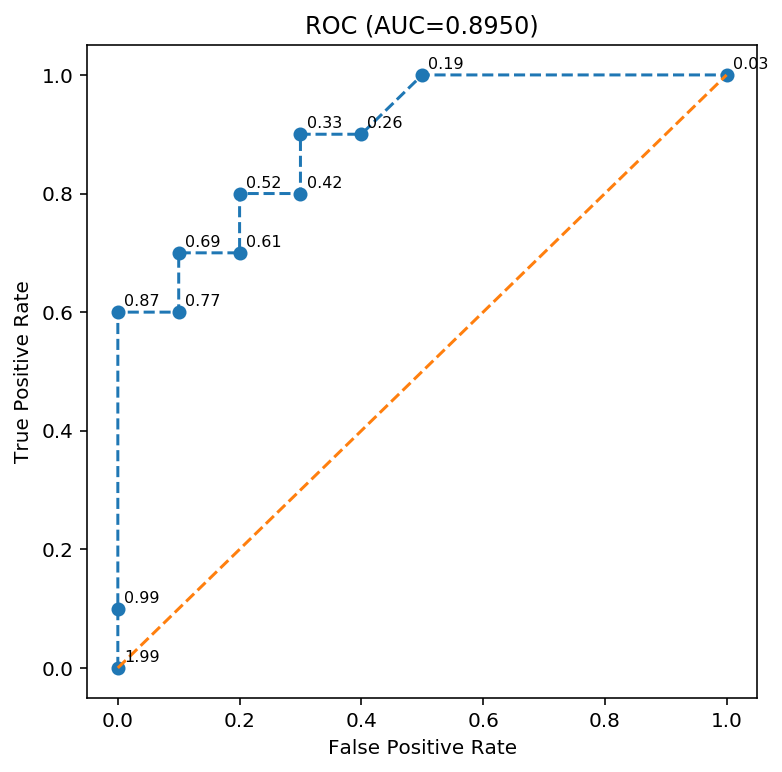

In [64]:
plt.figure(figsize=(6, 6))
plot_roc(model, X, y, show_threshold=True, n_points=None)
# plot_roc(model, X, y, show_threshold=False)

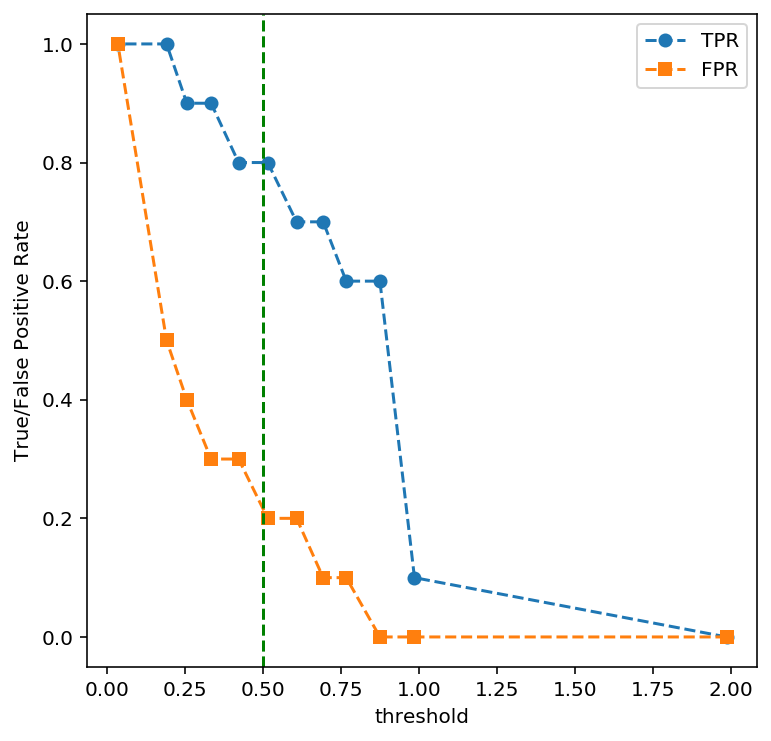

In [65]:
plt.figure(figsize=(6, 6))
plot_tpr_fpr(model, X, y, n_points=None)

In [66]:
y_score=model.predict_proba(X)[:, 1]
y_score
for t in range(0, 101, 10):
    thres = t/100
    col_name=f't{thres:0.2f}'
#     print(col_name)
    df[col_name]=np.where(y_score >= thres, 1, 0)
df

,Hours,Pass,prob_pass,t0.00,t0.10,t0.20,t0.30,t0.40,t0.50,t0.60,t0.70,t0.80,t0.90,t1.00
0,0.50,0,0.034710,1,0,0,0,0,0,0,0,0,0,0
1,0.75,0,0.049773,1,0,0,0,0,0,0,0,0,0,0
2,1.00,0,0.070892,1,0,0,0,0,0,0,0,0,0,0
3,1.25,0,0.100028,1,1,0,0,0,0,0,0,0,0,0
4,1.50,0,0.139344,1,1,0,0,0,0,0,0,0,0,0
5,1.75,0,0.190836,1,1,0,0,0,0,0,0,0,0,0
6,1.75,1,0.190836,1,1,0,0,0,0,0,0,0,0,0
7,2.00,0,0.255702,1,1,1,0,0,0,0,0,0,0,0
8,2.25,1,0.333529,1,1,1,1,0,0,0,0,0,0,0
9,2.50,0,0.421625,1,1,1,1,1,0,0,0,0,0,0


In [67]:
df.style.highlight_max(subset=df.columns[df.columns.str.match('t[01]')])

,Hours,Pass,prob_pass,t0.00,t0.10,t0.20,t0.30,t0.40,t0.50,t0.60,t0.70,t0.80,t0.90,t1.00
0,0.500000,0,0.034710,1,0,0,0,0,0,0,0,0,0,0
1,0.750000,0,0.049773,1,0,0,0,0,0,0,0,0,0,0
2,1.000000,0,0.070892,1,0,0,0,0,0,0,0,0,0,0
3,1.250000,0,0.100028,1,1,0,0,0,0,0,0,0,0,0
4,1.500000,0,0.139344,1,1,0,0,0,0,0,0,0,0,0
5,1.750000,0,0.190836,1,1,0,0,0,0,0,0,0,0,0
6,1.750000,1,0.190836,1,1,0,0,0,0,0,0,0,0,0
7,2.000000,0,0.255702,1,1,1,0,0,0,0,0,0,0,0
8,2.250000,1,0.333529,1,1,1,1,0,0,0,0,0,0,0
9,2.500000,0,0.421625,1,1,1,1,1,0,0,0,0,0,0


In [68]:
thresholds[2]

0.8744469476316917

In [69]:
np.where(y_score >= thresholds[2], 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [70]:
tmp_cf=metrics.confusion_matrix(y, np.where(y_score >= thresholds[4], 1, 0))
print(tmp_cf)
tpr(tmp_cf)

[[9 1]
 [3 7]]


0.7

In [71]:
thresholds

array([1.98519436, 0.98519436, 0.87444695, 0.76647995, 0.69261629,
       0.60735749, 0.51500967, 0.42162538, 0.3335292 , 0.2557023 ,
       0.1908358 , 0.03471019])

In [72]:
tprs

array([0. , 0.1, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 1. , 1. ])

In [73]:
fprs

array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.5, 1. ])

In [74]:
df.columns[df.columns.str.match('t[01]')]

Index(['t0.00', 't0.10', 't0.20', 't0.30', 't0.40', 't0.50', 't0.60', 't0.70',
       't0.80', 't0.90', 't1.00'],
      dtype='object')

In [75]:
metrics.confusion_matrix(df['Pass'], df['t0.50'])

array([[8, 2],
       [2, 8]], dtype=int64)

In [76]:
mx=[]
for t in range(0, 101, 10):
    thres = t/100
    col_name=f't{thres:0.2f}'
    cfm=metrics.confusion_matrix(df['Pass'], df[col_name])
    print(f'threshold = {col_name}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}, precision = {precision(cfm):.2f}')
    mx.append([thres, fpr(cfm), tpr(cfm), precision(cfm)])
    print(cfm)
    print('-' * 80)
mx=np.array(mx)
print(mx)

threshold = t0.00, TPR = 1.00, FPR = 1.00, precision = 0.50
[[ 0 10]
 [ 0 10]]
--------------------------------------------------------------------------------
threshold = t0.10, TPR = 1.00, FPR = 0.70, precision = 0.59
[[ 3  7]
 [ 0 10]]
--------------------------------------------------------------------------------
threshold = t0.20, TPR = 0.90, FPR = 0.40, precision = 0.69
[[6 4]
 [1 9]]
--------------------------------------------------------------------------------
threshold = t0.30, TPR = 0.90, FPR = 0.30, precision = 0.75
[[7 3]
 [1 9]]
--------------------------------------------------------------------------------
threshold = t0.40, TPR = 0.80, FPR = 0.30, precision = 0.73
[[7 3]
 [2 8]]
--------------------------------------------------------------------------------
threshold = t0.50, TPR = 0.80, FPR = 0.20, precision = 0.80
[[8 2]
 [2 8]]
--------------------------------------------------------------------------------
threshold = t0.60, TPR = 0.70, FPR = 0.20, precision = 0

Text(0, 0.5, 'True Positive Rate')

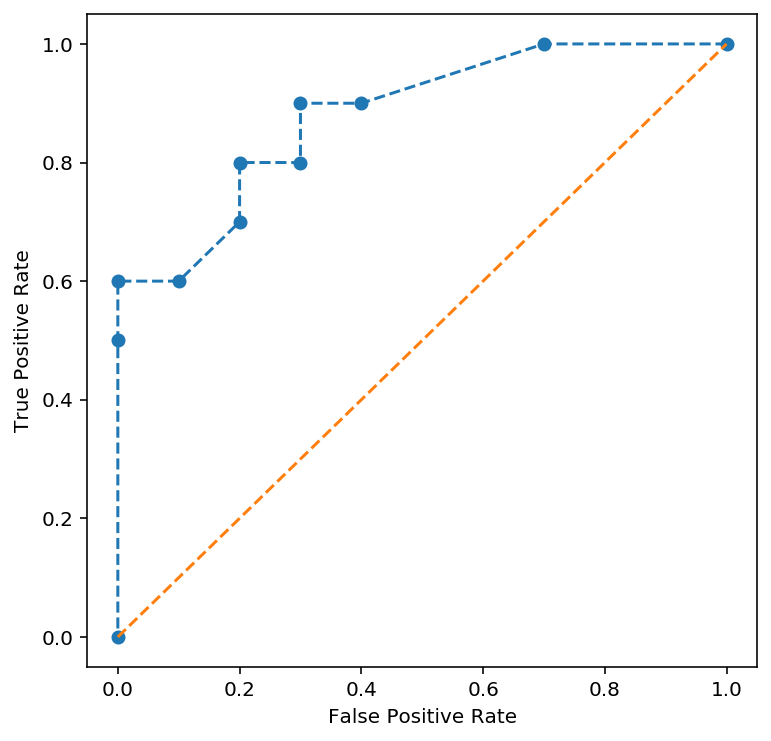

In [77]:
plt.figure(figsize=(6, 6))
plt.plot(mx[:, 1], mx[:, 2], '--o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

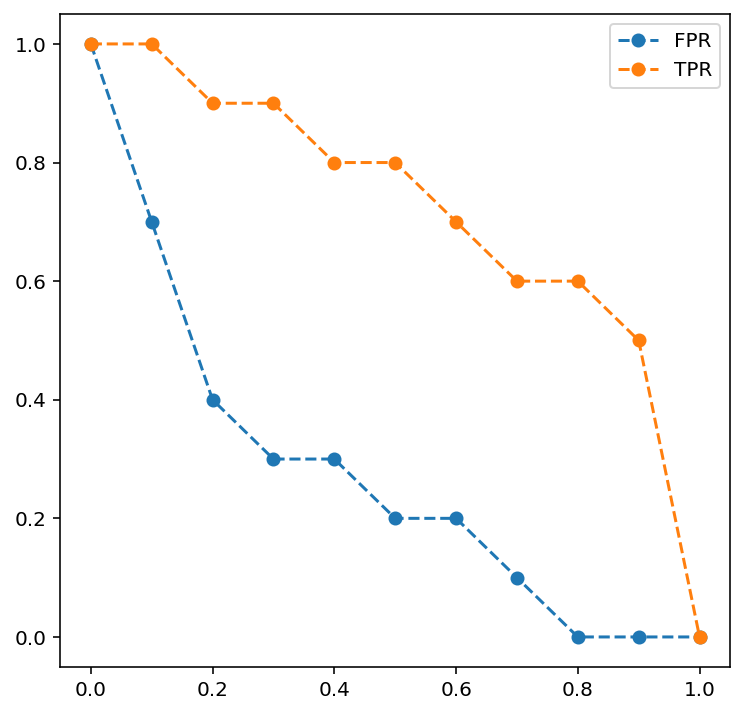

In [78]:
plt.figure(figsize=(6, 6))
plt.plot(mx[:, 0], mx[:, 1], '--o', label='FPR')
plt.plot(mx[:, 0], mx[:, 2], '--o', label='TPR')
plt.legend();

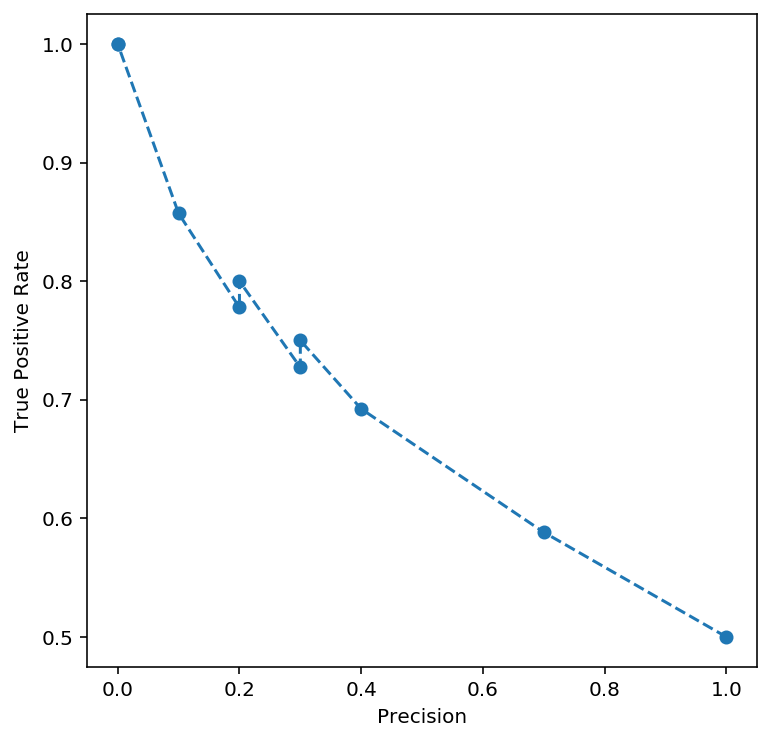

In [79]:
plt.figure(figsize=(6, 6))
plt.plot(mx[:, 1], mx[:, 3], '--o')
plt.xlabel('Precision')
plt.ylabel('True Positive Rate');

# scratch area

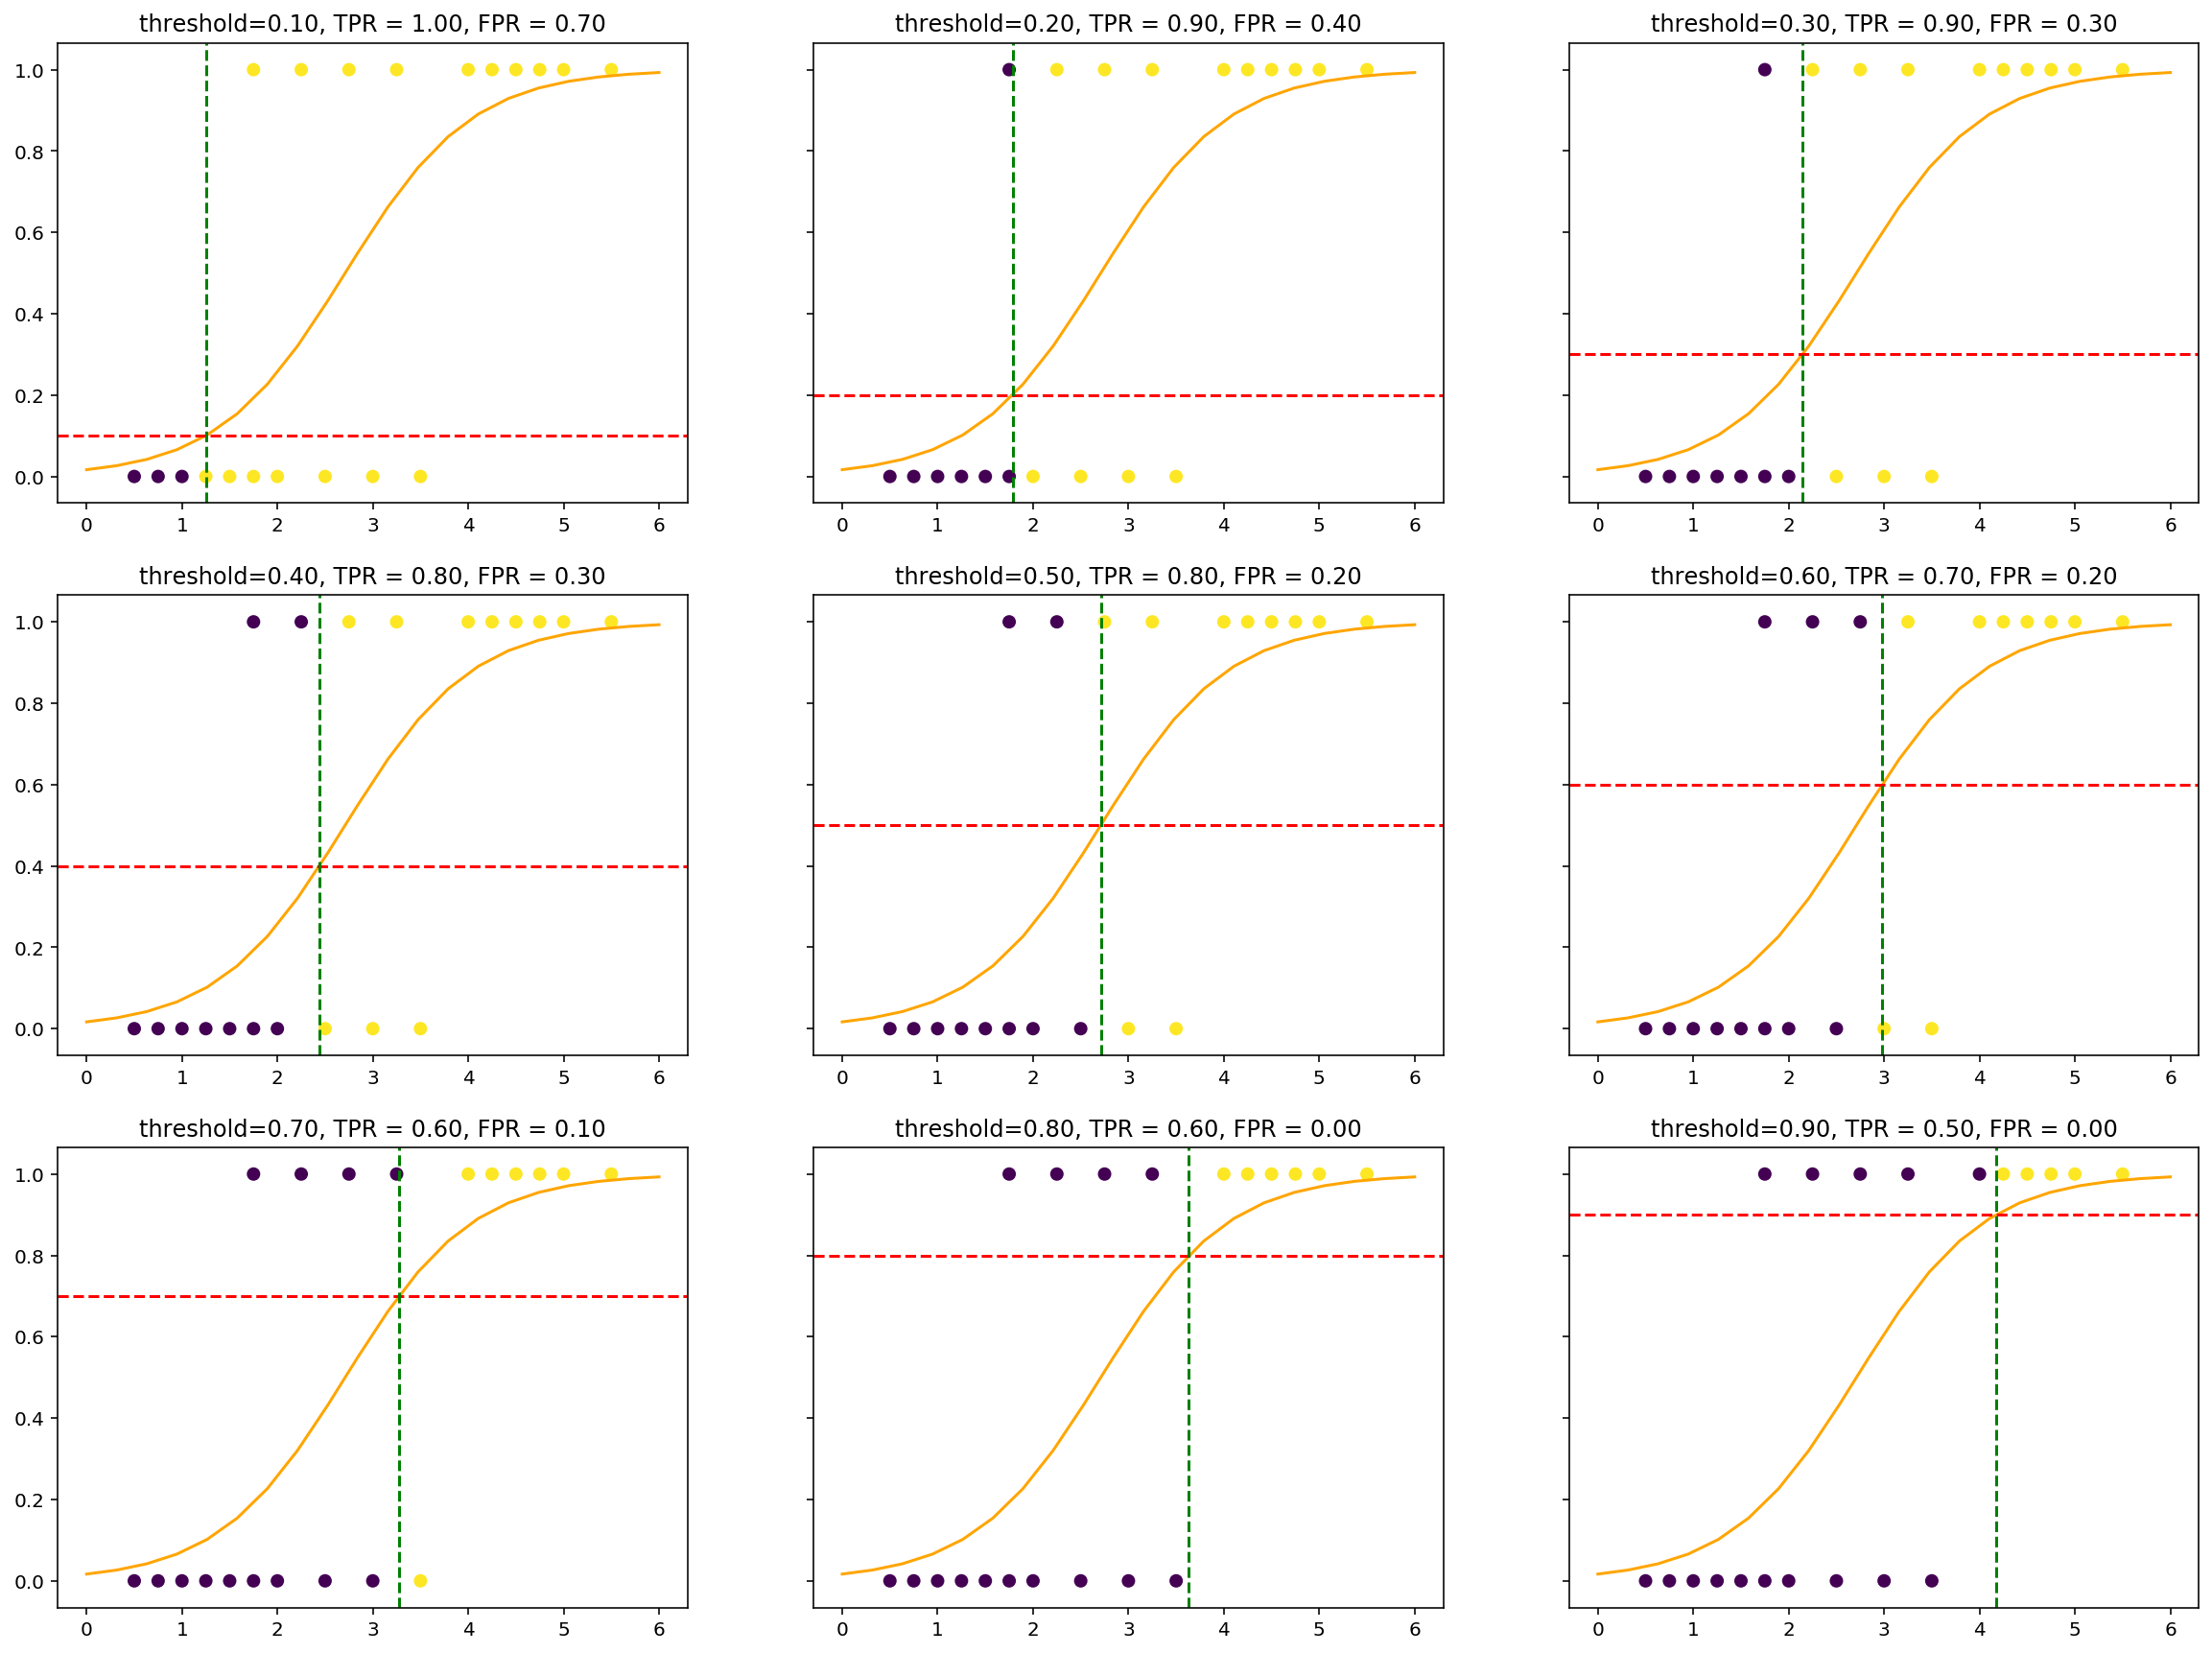

In [80]:
fig, ax = plt.subplots(3, 3, figsize=(20,15), sharex=False, sharey=True)
xp=np.linspace(0, 6, 20)
yp=sp(model.intercept_, model.coef_, xp).ravel()
thres=0.1
for r in range(ax.shape[0]):
    for c in range(ax.shape[1]):
        col_name=f't{thres:0.2f}'
#         ax[r, c].scatter(df['Hours'], df[col_name], c=df[f't{thres:.2f}'])
        ax[r, c].scatter(df['Hours'], df['Pass'], c=df[f't{thres:.2f}'])
        ax[r, c].plot(xp, yp, color='orange')
        ax[r, c].axhline(thres, color='red', linestyle='--')
        ax[r, c].axvline(solve(model.intercept_, model.coef_, thres), color='green', linestyle='--')

        cfm=metrics.confusion_matrix(df['Pass'], df[col_name])
#         print(f'threshold = {col_name}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}')
        ax[r, c].set_title(f'threshold={thres:.2f}, TPR = {tpr(cfm):.2f}, FPR = {fpr(cfm):.2f}')
        thres += .1
        if thres > 1:
            break